In [22]:
#Get all essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [23]:
#Get the data
data = pd.read_csv("/home/sagar/Desktop/Desk_folders/Artificial Intelligence - Machine Learning/4.Case_Study_Regression_Methods/Classification/heart.xls")
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

Attribute Information
1) age
2) sex
3) chest pain type (4 values)
4) resting blood pressure
5) serum cholestoral in mg/dl
6)fasting blood sugar > 120 mg/dl
7) resting electrocardiographic results (values 0,1,2)
8) maximum heart rate achieved
9) exercise induced angina
10) oldpeak = ST depression induced by exercise relative to rest
11)the slope of the peak exercise ST segment
12) number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14) target: 0= less chance of heart attack 1= more chance of heart attack

In [24]:
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

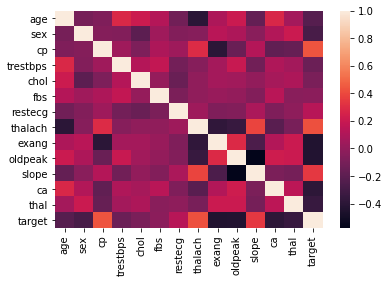

In [6]:
# check for any correlations between variables
corr = data.corr()
sns.heatmap(corr)

In [53]:
# create x and y
feature_cols = ['cp','thalach','slope','restecg','chol','trestbps','fbs','oldpeak'] 
x = data[feature_cols] # predictor
y = data.target # response

In [54]:
x.head()

cp  thalach  slope  restecg  chol  trestbps  fbs  oldpeak
0   3      150      0        0   233       145    1      2.3
1   2      187      0        1   250       130    0      3.5
2   1      172      2        0   204       130    0      1.4
3   1      178      2        1   236       120    0      0.8
4   0      163      2        1   354       120    0      0.6

In [55]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [56]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 2) 
# the test set will be 20% of the whole data set

In [57]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 8)
(61, 8)
(242,)
(61,)


In [58]:
# instantiate, fit
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/home/sagar/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
logreg.predict(np.array([[0,108,1,0,250,160,1,1.5]]))

array([0])

In [14]:
data[data['target'] == 0]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
165   67    1   0       160   286    0        0      108      1      1.5   
166   67    1   0       120   229    0        0      129      1      2.6   
167   62    0   0       140   268    0        0      160      0      3.6   
168   63    1   0       130   254    0        0      147      0      1.4   
169   53    1   0       140   203    1        0      155      1      3.1   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
165      1   3     2       0  
166      1   2     3       0  
167      0   2     2       0  
168      1   1     3       0  
169      0   0     3       0  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[138 rows x 14 columns]

In [15]:
data[data['target'] == 1]

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
160   56    1   1       120   240    0        1      169      0      0.0   
161   55    0   1       132   342    0        1      166      0      1.2   
162   41    1   1       120   157    0        1      182      0      0.0   
163   38    1   2       138   175    0        1      173      0      0.0   
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
160      0   0     2       1  
161      2   0     2       1  
162      2   0     2       1  
163      2   4     2       1  
164      2   4     2       1  

[165 rows x 14 columns]

In [60]:
logreg.predict(np.array([[3,150,0,0,233,130,0,3.5]]))

array([0])

In [61]:
# Use score method to get accuracy of model
score = logreg.score(x_test, y_test)
print(score)

0.819672131147541


In [62]:
#Confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, logreg.predict(x_test))
print(cm)

[[22 10]
 [ 1 28]]


In [63]:
#Precision - best value is 1 and worst is 0
precision = metrics.precision_score(y_test, logreg.predict(x_test))
print(precision)

0.7368421052631579


In [64]:
#Recall or sesitivity - best value is 1 and worst is 0
recall = metrics.recall_score(y_test, logreg.predict(x_test))
print(recall)

0.9655172413793104


In [65]:
#F1 score - best value is 1 and worst is 0
f1 = metrics.f1_score(y_test, logreg.predict(x_test))
print(f1)

0.835820895522388
